In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation

In [4]:
#Task 1: Read the dataset and do data Pre-processing
#Read the dataset
df = pd.read_csv('/content/drive/MyDrive/drug200.csv')
#Perform data pre-processing
df.isnull().any()
df.isnull().sum()
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [5]:
df.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: >

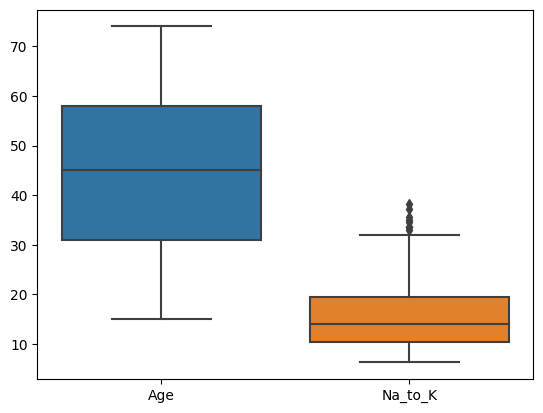

In [7]:
sns.boxplot(df)

<Axes: >

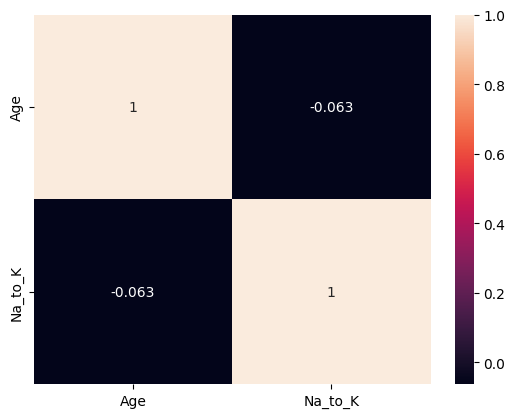

In [8]:
sns.heatmap(df.corr(),annot = True)

<Axes: >

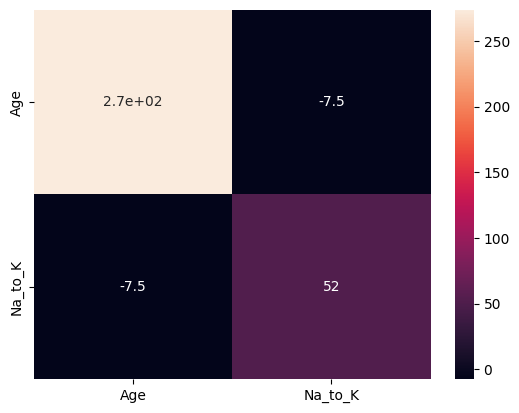

In [9]:
sns.heatmap(df.cov(),annot=True)

<Axes: xlabel='Na_to_K', ylabel='Density'>

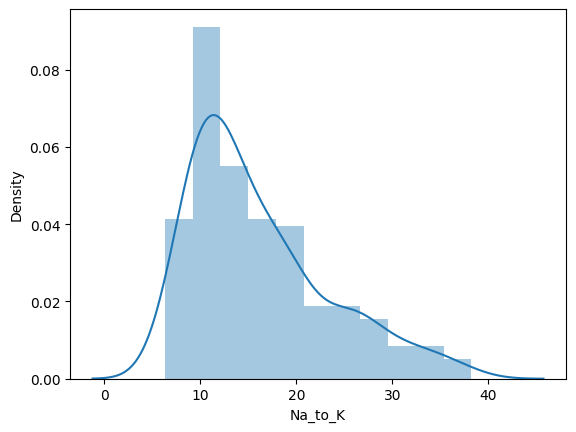

In [10]:
sns.distplot(df['Na_to_K'])

<Axes: xlabel='Age', ylabel='Na_to_K'>

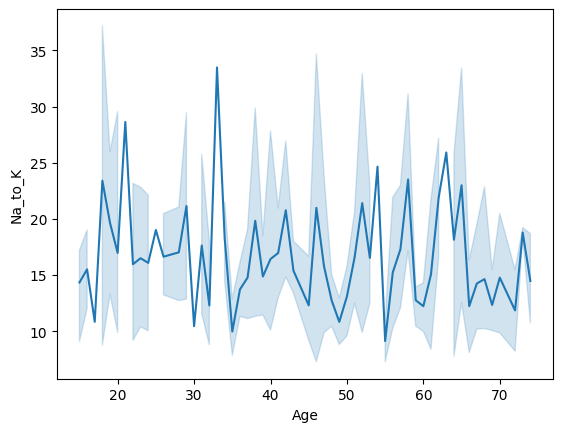

In [11]:
sns.lineplot(x = df['Age'],y = df['Na_to_K'])

In [12]:
#Encode categorical variables
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP']) 
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

#Normalize numerical variables
scaler = preprocessing.StandardScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])

#Split the data into features and labels 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y = pd.get_dummies(df.iloc[:,5:]).values 
print(df['Drug'].unique())

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)
print(y)

          Age  Sex  BP  Cholesterol   Na_to_K
0   -1.291591    0   0            0  1.286522
1    0.162699    1   1            0 -0.415145
2    0.162699    1   1            0 -0.828558
3   -0.988614    0   2            0 -1.149963
4    1.011034    0   1            0  0.271794
..        ...  ...  ..          ...       ...
195  0.708057    0   1            0 -0.626917
196 -1.715759    1   1            0 -0.565995
197  0.465676    1   2            0 -0.859089
198 -1.291591    1   2            1 -0.286500
199 -0.261469    0   1            1 -0.657170

[200 rows x 5 columns]
[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 

In [14]:
X.shape,y.shape

((200, 5), (200, 5))

In [16]:
#Task 2: Build the ANN Model
#Build the ANN model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.shape[1])) # Input layer
model.add(Dense(16, activation='relu')) # Hidden layer 1
model.add(Dense(8, activation='relu')) # Hidden layer 2
model.add(Dense(4, activation='relu')) # Hidden layer 3
model.add(Dense(5, activation='softmax')) # Output layer

In [17]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 5)                 25        
                                                                 
Total params: 917
Trainable params: 917
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Train the model
model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/10
32/32 [==============================] - 2s 11ms/step - loss: 1.6210 - accuracy: 0.1750 - val_loss: 1.5869 - val_accuracy: 0.3000
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.5625 - accuracy: 0.3688 - val_loss: 1.5566 - val_accuracy: 0.3500
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 1.5269 - accuracy: 0.4062 - val_loss: 1.5171 - val_accuracy: 0.3250
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 1.4781 - accuracy: 0.4062 - val_loss: 1.4591 - val_accuracy: 0.3000
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 1.4051 - accuracy: 0.4062 - val_loss: 1.3680 - val_accuracy: 0.3750
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 1.2934 - accuracy: 0.5500 - val_loss: 1.2724 - val_accuracy: 0.5750
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1594 - accuracy: 0.6000 - val_loss: 1.1628 - val_accuracy: 0.5750
Epoch 8/10
32/32 [=

In [20]:
ypred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step
